In [126]:
import numpy as np
import matplotlib.pyplot as plt
import fractions as frac
import pandas as pd

In [127]:
def cmp_fun(k):
    return (4**(-k))/3

In [128]:
def x_n_float32(n: int, x0, x1):
    x = np.zeros(n, dtype=np.float32) 
    x[0] = x0
    x[1] = x1

    for i in range(2,n):
        x[i] = np.float32(2.25)*x[i-1] - np.float32(0.5)*x[i-2]
    
    return x

In [129]:
def x_n_float64(n: int, x0, x1):
    x = np.zeros(n, dtype=np.float64) 
    x[0] = x0
    x[1] = x1

    for i in range(2,n):
        x[i] = np.float64(2.25)*x[i-1] - np.float64(0.5)*x[i-2]
    
    return x

In [130]:
def x_n_fraction(n: int, x0, x1):
    x = [frac.Fraction(0,1) for _ in range(n)]
    x[0] = x0
    x[1] = x1

    for i in range(2,n):
        x[i] = frac.Fraction(9,4) * x[i-1] - frac.Fraction(1,2) * x[i-2]
    
    return x

In [131]:
ys_float_32 = x_n_float32(225,np.float32(1/3),np.float32(1/12))

C:\Users\KUBA\AppData\Local\Temp\ipykernel_10936\15371033.py:7: RuntimeWarning: overflow encountered in scalar multiply
  x[i] = np.float32(2.25)*x[i-1] - np.float32(0.5)*x[i-2]
C:\Users\KUBA\AppData\Local\Temp\ipykernel_10936\15371033.py:7: RuntimeWarning: invalid value encountered in scalar subtract
  x[i] = np.float32(2.25)*x[i-1] - np.float32(0.5)*x[i-2]


In [132]:
ys_float_64 = x_n_float64(60,np.float64(1/3),np.float64(1/12))

In [133]:
ys_fraction = x_n_fraction(225,frac.Fraction(1,3), frac.Fraction(1,12))

In [134]:
ys_cmp225 = np.array([cmp_fun(i) for i in range(225)])
ys_cmp60 = np.array([cmp_fun(i) for i in range(60)])

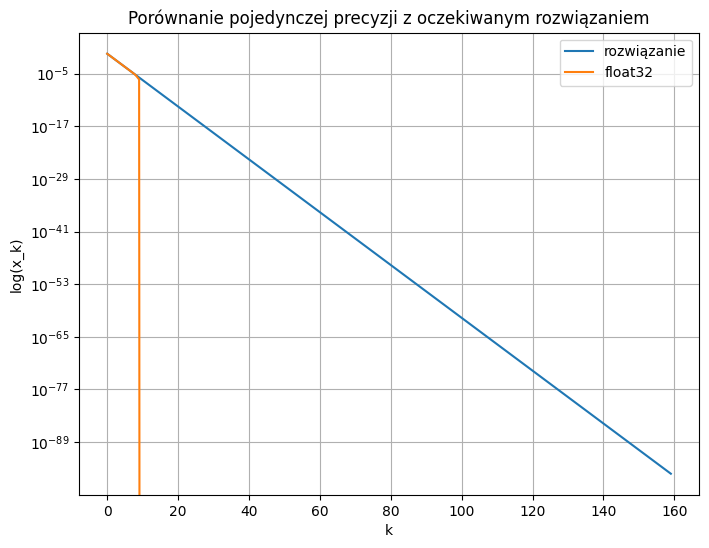

In [135]:
xs = np.arange(0,160)
plt.figure(figsize=(8,6))
plt.grid(visible=True)
plt.semilogy(xs,ys_cmp225[0:160],label="rozwiązanie")
plt.semilogy(xs,ys_float_32[0:160],label="float32")
plt.legend()
plt.title("Porównanie pojedynczej precyzji z oczekiwanym rozwiązaniem")
plt.xlabel("k")
plt.ylabel(r'log(x_k)')
plt.show()

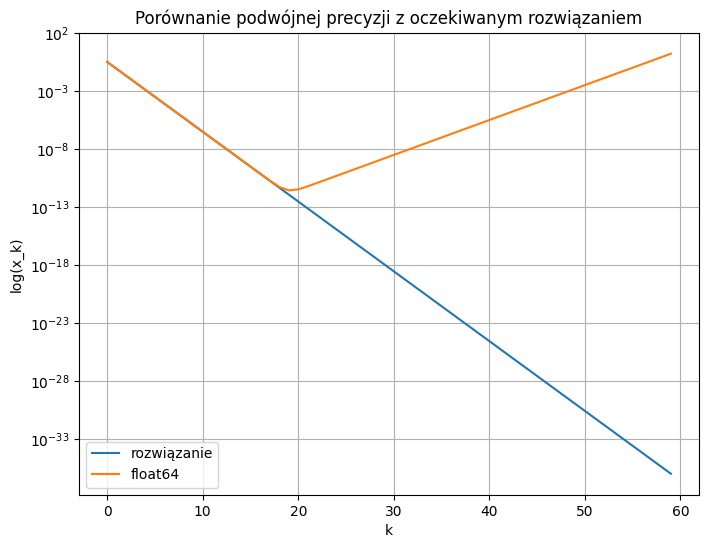

In [136]:
xs = np.arange(0,60)
plt.figure(figsize=(8,6))
plt.grid(visible=True)
plt.semilogy(xs,ys_cmp60, label="rozwiązanie")
plt.semilogy(xs,ys_float_64, label="float64")
plt.title("Porównanie podwójnej precyzji z oczekiwanym rozwiązaniem")
plt.xlabel("k")
plt.ylabel("log(x_k)")
plt.legend()
plt.show()

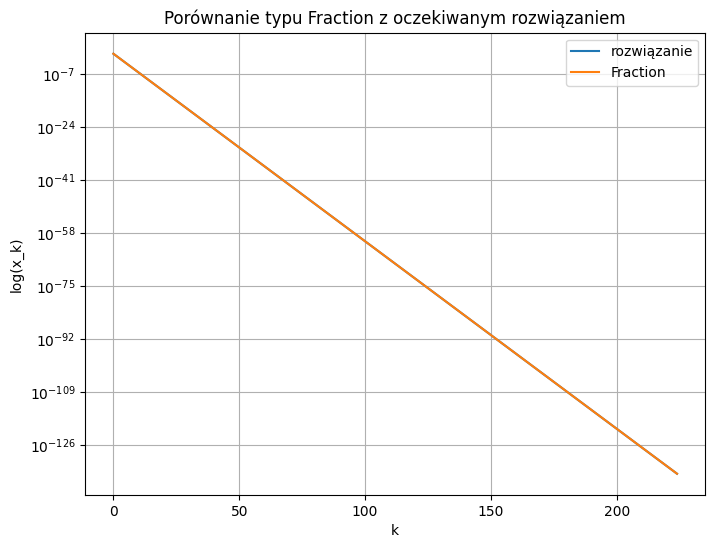

In [137]:
xs = np.arange(0,225)
plt.figure(figsize=(8,6))
plt.grid(visible=True)
plt.semilogy(xs,ys_cmp225, label="rozwiązanie")
plt.semilogy(xs,ys_fraction, label="Fraction")
plt.title("Porównanie typu Fraction z oczekiwanym rozwiązaniem")
plt.xlabel("k")
plt.ylabel("log(x_k)")
plt.legend()
plt.show()

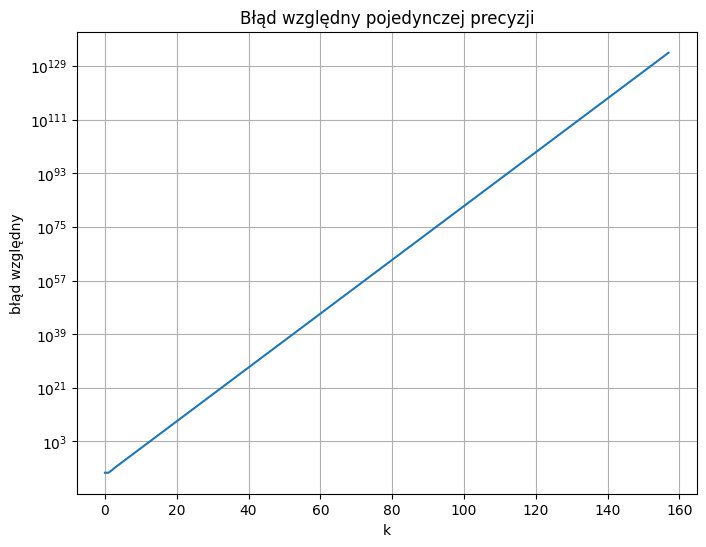

In [138]:
xs = np.arange(0,225)
plt.figure(figsize=(8,6))
plt.grid(visible=True)
ys_float_32_error = abs(ys_float_32 - ys_cmp225)/ys_cmp225
plt.semilogy(xs[0:160],ys_float_32_error[0:160])
plt.title("Błąd względny pojedynczej precyzji")
plt.xlabel('k')
plt.ylabel("błąd względny")
plt.show()

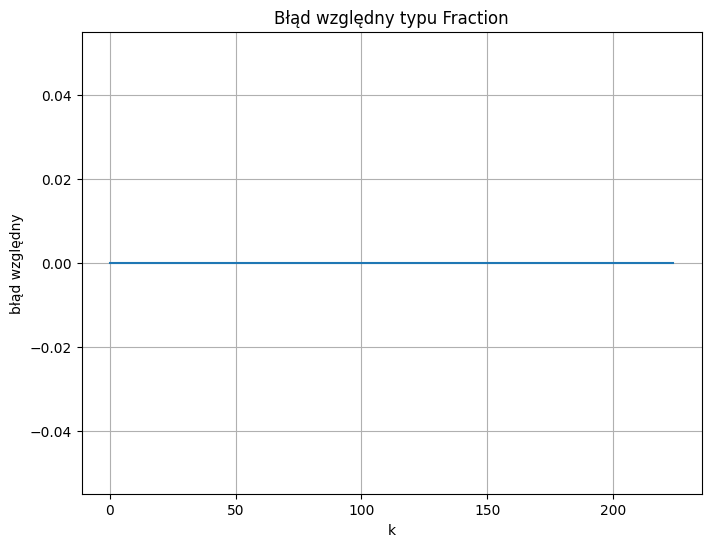

In [139]:
xs = np.arange(0,225)
plt.figure(figsize=(8,6))
plt.grid(visible=True)
ys_fraction_error = abs(ys_fraction - ys_cmp225)/ys_cmp225
plt.plot(xs,ys_fraction_error)
plt.title("Błąd względny typu Fraction")
plt.xlabel('k')
plt.ylabel("błąd względny")
plt.show()

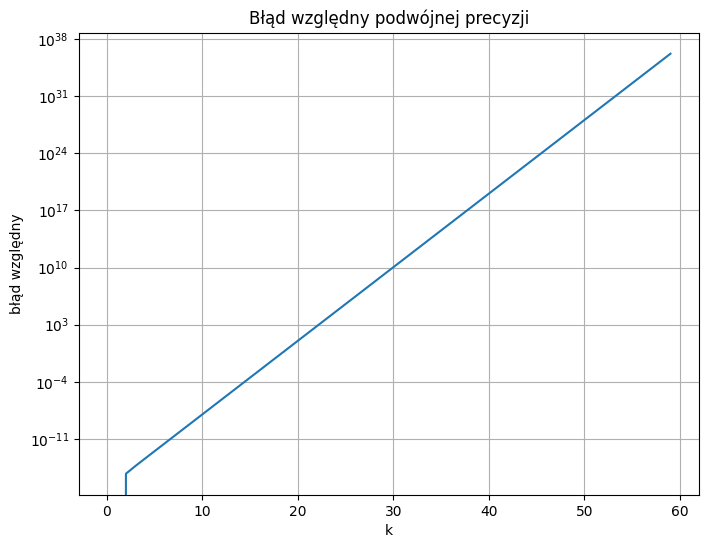

In [140]:
xs = np.arange(0,60)
plt.figure(figsize=(8,6))
plt.grid(visible=True)
ys_float_64_error = abs(ys_float_64 - ys_cmp60)/ys_cmp60
plt.semilogy(xs,ys_float_64_error)
plt.title("Błąd względny podwójnej precyzji")
plt.xlabel('k')
plt.ylabel("błąd względny")
plt.show()

In [141]:
df_float32 = pd.DataFrame()
df_float32["float32"] = ys_float_32[0:160]
df_float32["solution"] = ys_cmp225[0:160]
df_float32["error float32"] = abs(ys_float_32[0:160] - ys_cmp225[0:160])/ys_cmp225[0:160]
df_float32 = df_float32.rename_axis('k', axis='columns')
from math import isnan
for i, x in enumerate(ys_float_32):
    if isnan(x): 
        print(f"Pierwszy wyraz ciągu ewaluowany na NaN: {i}")
        break
df_float32

Pierwszy wyraz ciągu ewaluowany na NaN: 160


k,float32,solution,error float32
0,3.333333e-01,3.333333e-01,2.980232e-08
1,8.333334e-02,8.333333e-02,2.980232e-08
2,2.083333e-02,2.083333e-02,2.384186e-07
3,5.208321e-03,5.208333e-03,2.384186e-06
4,1.302058e-03,1.302083e-03,1.955032e-05
...,...,...,...
155,-7.291766e+37,1.598012e-94,4.563022e+131
156,-1.458353e+38,3.995030e-95,3.650418e+132
157,-2.916706e+38,9.987576e-96,2.920334e+133
158,-inf,2.496894e-96,inf


In [142]:
df_fraction = pd.DataFrame()
df_fraction["fraction"] = ys_fraction
df_fraction["solution"] = ys_cmp225
df_fraction["error float32"] = abs(ys_fraction - ys_cmp225) / ys_cmp225
df_fraction = df_fraction.rename_axis('k', axis='columns')
df_fraction

k,fraction,solution,error float32
0,1/3,3.333333e-01,0.0
1,1/12,8.333333e-02,0.0
2,1/48,2.083333e-02,0.0
3,1/192,5.208333e-03,0.0
4,1/768,1.302083e-03,0.0
...,...,...,...
220,1/85176413003391432486248883736875531369567346...,1.174034e-133,0.0
221,1/34070565201356572994499553494750212547826938...,2.935085e-134,0.0
222,1/13628226080542629197799821397900085019130775...,7.337712e-135,0.0
223,1/54512904322170516791199285591600340076523102...,1.834428e-135,0.0


In [143]:
df60 = pd.DataFrame()
df60["float64"] = ys_float_64
df60["solution"] = ys_cmp60
df60['error float64'] = abs(ys_float_64-ys_cmp60)/ys_cmp60
df60 = df60.rename_axis('k', axis='columns')
df60

k,float64,solution,error float64
0,3.333333e-01,3.333333e-01,0.000000e+00
1,8.333333e-02,8.333333e-02,0.000000e+00
2,2.083333e-02,2.083333e-02,4.996004e-16
3,5.208333e-03,5.208333e-03,4.496403e-15
4,1.302083e-03,1.302083e-03,3.647083e-14
5,3.255208e-04,3.255208e-04,2.922662e-13
6,8.138021e-05,8.138021e-05,2.338629e-12
7,2.034505e-05,2.034505e-05,1.870953e-11
8,5.086263e-06,5.086263e-06,1.496768e-10
9,1.271566e-06,1.271566e-06,1.197415e-09
